In [1]:
from google.cloud import bigquery
import os
import pandas as pd

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '../../../gcp_credentials.json'
client = bigquery.Client()

In [2]:
query = """
    select
      address,
      farcaster_prepermissionless > 0 as farcaster_prepermissionless,
      eigentrust_verification > 0 as eigentrust_verification,
      passport_verification > 0 as passport_verification,
      optimist_nft_verification > 0 as optimist_nft_verification,
      airdrop_verification > 0 as airdrop_verification
    from `opensource-observer.oso.rf4_trusted_users`
    where is_trusted_user = True
"""
results = client.query(query)

In [3]:
df = results.to_dataframe()
df.head(1)

,address,farcaster_prepermissionless,eigentrust_verification,passport_verification,optimist_nft_verification,airdrop_verification
0,34arafcmp7w4huudihocfe3tik4kft97rmwdtuxthmrv,False,True,False,False,False


In [4]:
len(df)

97728

In [5]:
df = df[df['address'].str.contains('0x') == True]
df.set_index('address', inplace=True)
len(df)

89351

In [6]:
df.corr()

,farcaster_prepermissionless,eigentrust_verification,passport_verification,optimist_nft_verification,airdrop_verification
farcaster_prepermissionless,1.000000,0.106460,-0.247477,0.092035,-0.065982
eigentrust_verification,0.106460,1.000000,-0.690420,-0.136182,-0.251715
passport_verification,-0.247477,-0.690420,1.000000,-0.105571,0.144494
optimist_nft_verification,0.092035,-0.136182,-0.105571,1.000000,-0.033716
airdrop_verification,-0.065982,-0.251715,0.144494,-0.033716,1.000000


In [7]:
df.sum(axis=0)

farcaster_prepermissionless    14999
eigentrust_verification        44979
passport_verification          39498
optimist_nft_verification       3187
airdrop_verification           15721
dtype: Int64

<Axes: >

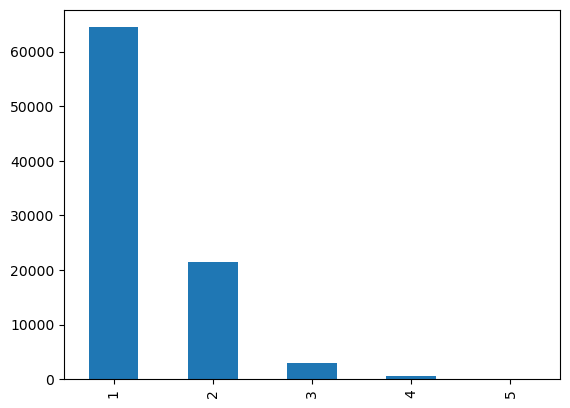

In [8]:
df.sum(axis=1).value_counts().plot(kind='bar')

In [9]:
df.sort_index().reset_index()['address'].to_csv('data/op_rf4_trusted_addresses.csv')